In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('Estimates-on-the-use-of-water-(2020)-a-3712(2).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    213 non-null    object 
 1   income_group            213 non-null    object 
 2   is_text_income_group    213 non-null    bool   
 3   pop_n                   213 non-null    float64
 4   is_numeric_pop_n        213 non-null    bool   
 5   pop_u                   213 non-null    object 
 6   is_numeric_pop_u        213 non-null    bool   
 7   wat_bas_n               213 non-null    float64
 8   is_numeric_wat_bas_n    213 non-null    bool   
 9   wat_lim_n               213 non-null    float64
 10  is_numeric_wat_lim_n    213 non-null    bool   
 11  wat_unimp_n             213 non-null    object 
 12  is_numeric_wat_unimp_n  213 non-null    bool   
 13  wat_sur_n               213 non-null    float64
 14  is_numeric_wat_sur_n    213 non-null    bo

In [12]:
df

,name,income_group,is_text_income_group,pop_n,is_numeric_pop_n,pop_u,is_numeric_pop_u,wat_bas_n,is_numeric_wat_bas_n,wat_lim_n,...,is_numeric_wat_sur_r,wat_bas_u,is_numeric_wat_bas_u,wat_lim_u,is_numeric_wat_lim_u,wat_unimp_u,is_numeric_wat_unimp_u,wat_sur_u,is_numeric_wat_sur_u,value_cnt
0,Tokelau,0,False,1.350000e+00,True,0,True,99.707677,True,0.000000,...,True,0.000000,True,0.000000,True,0.000000,True,0.000000,True,30
1,Niue,0,False,1.618000e+00,True,46.20200348,True,97.010876,True,0.000000,...,True,0.000000,True,0.000000,True,0.000000,True,0.000000,True,30
2,Falkland Islands (Malvinas),0,False,3.483000e+00,True,78.50799561,True,95.308927,True,0.000000,...,True,100.000000,True,0.000000,True,0.000000,True,0.000000,True,30
3,Montserrat,0,False,4.999000e+00,True,9.114999771,True,98.077483,True,0.000000,...,True,0.000000,True,0.000000,True,0.000000,True,0.000000,True,30
4,Saint Pierre and Miquelon,0,False,5.795000e+00,True,89.96199799,True,91.400000,True,0.000000,...,True,0.000000,True,0.000000,True,0.000000,True,0.000000,True,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Pakistan,Lower middle income,True,2.208923e+05,True,37.16500092,True,90.148965,True,3.822280,...,True,92.768050,True,3.771561,True,3.126185,True,0.334204,True,30
209,Indonesia,Lower middle income,True,2.735236e+05,True,56.64099884,True,92.415350,True,0.855475,...,True,97.580512,True,0.608510,True,1.679615,True,0.131363,True,30
210,United States of America,High income,True,3.310027e+05,True,82.66400146,True,99.883527,True,0.000000,...,True,99.928144,True,0.000000,True,0.071856,True,0.000000,True,30
211,India,Lower middle income,True,1.380004e+06,True,34.9260025,True,90.489525,True,4.983603,...,True,93.670036,True,3.272056,True,2.820608,True,0.237300,True,30


In [13]:
# Identify outiers in the pop_n
Q1 = df['pop_n'].quantile(0.25)
Q3 = df['pop_n'].quantile(0.75)
IQR = Q3 - Q1

In [16]:
# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [18]:
# Identify outliers
outliers = df[(df['pop_n'] < lower_bound) | (df['pop_n'] > upper_bound)]
print("Outliers in 'pop_n':")
print(outliers[['name', 'pop_n']])

Outliers in 'pop_n':
                                 name         pop_n
191                            France  6.527351e+04
192                    United Kingdom  6.788601e+04
193                          Thailand  6.979998e+04
194                           Germany  8.378395e+04
195        Iran (Islamic Republic of)  8.399295e+04
196                            Turkey  8.433907e+04
197  Democratic Republic of the Congo  8.956141e+04
198                          Viet Nam  9.733859e+04
199                             Egypt  1.023344e+05
200                       Philippines  1.095811e+05
201                          Ethiopia  1.149636e+05
202                             Japan  1.264765e+05
203                            Mexico  1.289328e+05
204                Russian Federation  1.459345e+05
205                        Bangladesh  1.646894e+05
206                           Nigeria  2.061396e+05
207                            Brazil  2.125594e+05
208                          Pakistan  2.20

In [19]:
# Review Unique Values in 'income_group'
unique_income_groups = df['income_group'].unique()
print('Unique income groups:')
print(unique_income_groups)

Unique income groups:
['0' 'High income' 'Upper middle income' 'Upper middle income,59.19400024'
 'Lower middle income' 'Low income']


In [21]:
# Correct inconsistent values in 'income_group'
income_group_corrections = {
    '0': 'Unknown'
}

df['income_groups'] = df['income_group'].replace(income_group_corrections)

In [24]:
# Convert water access columns to numeric
water_access_columns = ['wat_bas_n', 'wat_lim_n', 'wat_unimp_n', 'wat_sur_n']
for col in water_access_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Convert to numeric, set errors to NaN

In [25]:
# Aggregate data by 'income_group'
agg_data = df.groupby('income_group').agg({
    'wat_bas_n': 'mean',
    'wat_lim_n': 'mean',
    'wat_unimp_n': 'mean',
    'wat_sur_n': 'mean'
}).reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_18708\2064746956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agg_data, x='income_group', y='wat_bas_n', palette='viridis')


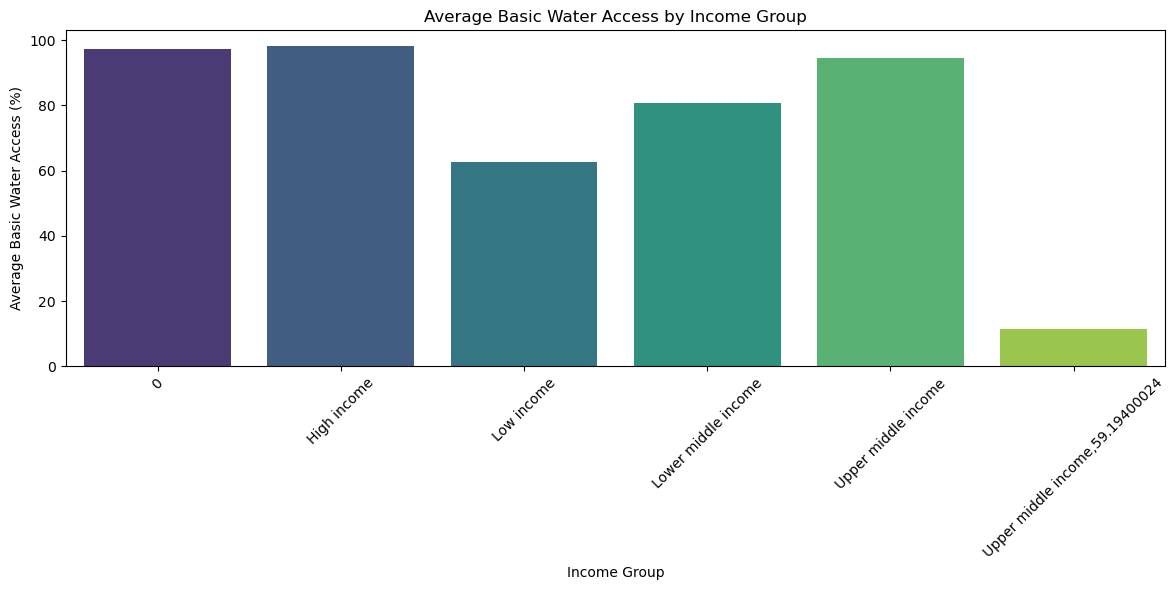

In [26]:
# Create visualizations
plt.figure(figsize=(12, 6))
sns.barplot(data=agg_data, x='income_group', y='wat_bas_n', palette='viridis')
plt.title('Average Basic Water Access by Income Group')
plt.xlabel("Income Group")
plt.ylabel("Average Basic Water Access (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
# Validation Numeric Columns
numeric_columns = ['pop_n', 'pop_u'] + water_access_columns
for col in numeric_columns:
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"Column {col} is not numeric!")

Column pop_u is not numeric!


In [29]:
# Standardize Numeric Formatting
# Rounding numeric columns to 2 decimal places
df[numeric_columns] = df[numeric_columns].round(2)

In [30]:
# Final review
print('Final dataset summary:')
print(df.describe())

Final dataset summary:
              pop_n   wat_bas_n   wat_lim_n  wat_unimp_n   wat_sur_n  \
count  2.130000e+02  213.000000  213.000000   212.000000  213.000000   
mean   3.655734e+04   88.279014    3.753709     4.309104    2.846432   
std    1.426794e+05   18.970130    6.917229     7.134394    9.744419   
min    1.350000e+00    0.000000    0.000000     0.000000    0.000000   
25%    7.865600e+02   85.220000    0.000000     0.030000    0.000000   
50%    6.871290e+03   97.310000    0.430000     0.760000    0.000000   
75%    2.577881e+04   99.880000    4.080000     5.135000    1.860000   
max    1.463140e+06  100.000000   37.430000    33.540000   94.430000   

        wat_bas_r   wat_lim_r   wat_bas_u   wat_lim_u  wat_unimp_u  \
count  213.000000  213.000000  213.000000  213.000000   213.000000   
mean    61.654066    4.552206   75.959514    2.628931     1.307219   
std     39.615853    8.125637   38.494064    5.280566     2.708643   
min      0.000000    0.000000    0.000000    0.0

In [33]:
# Drop irrelevant columns
columns_to_drop = ['income_group', 'is_text_income_group', 'is_numeric_pop_n', 'is_numeric_pop_u']  # Add any other irrelevant columns
df.drop(columns=columns_to_drop, inplace=True)

In [37]:
# Convert water access columns to numeric, handling errors
water_access_columns = ['wat_bas_n', 'wat_lim_n', 'wat_unimp_n', 'wat_sur_n']
for col in water_access_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, set errors to NaN

# Convert 'pop_u', to numeric
df['pop_u'] = pd.to_numeric(df['pop_u'], errors='coerce') # Convert to numeric, set errors to NaN

# Handle missing values
df.fillna(0, inplace=True)  # Replace NaN with 0 or use df.dropna() to remove rows with NaN

In [38]:
# Analyzing Population Size
# Create a new column for rural population share
df['pop_r'] = 100 - df['pop_u']  # Assuming urban and rural share sum to 100%

In [39]:
# Creating Summaries
summary_stats = df[water_access_columns].agg(['max', 'min', 'mean', 'std', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]  # Flatten MultiIndex
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
          w_a_t___b_a_s___n  w_a_t___l_i_m___n  w_a_t___u_n_i_m_p___n  \
max              100.000000          37.430000              33.540000   
min                0.000000           0.000000               0.000000   
mean              88.279014           3.753709               4.288873   
std               18.970130           6.917229               7.123669   
<lambda>          85.220000           0.000000               0.030000   
<lambda>          99.880000           4.080000               5.110000   

          w_a_t___s_u_r___n  
max               94.430000  
min                0.000000  
mean               2.846432  
std                9.744419  
<lambda>           0.000000  
<lambda>           1.860000  


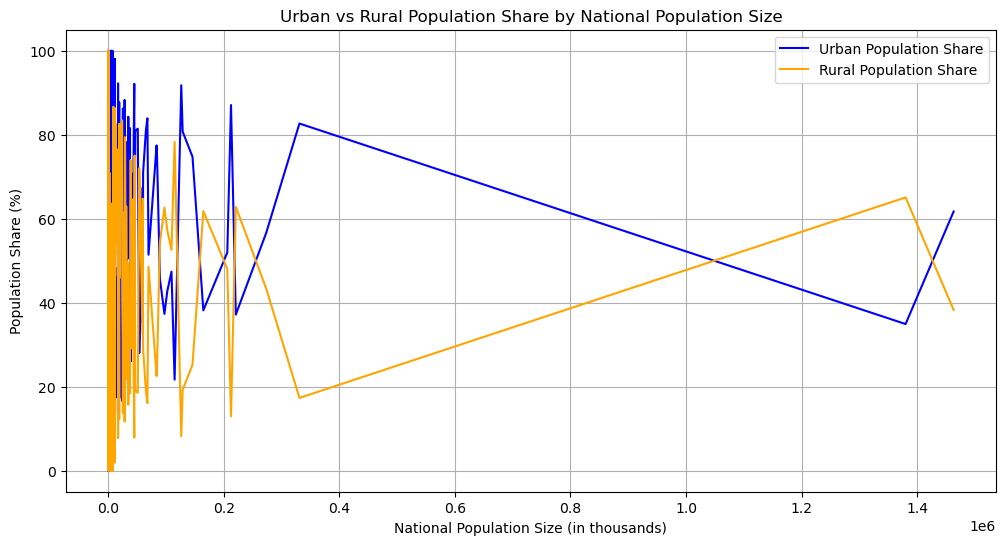

In [40]:
# Visualizing Data
# Line Chart for Urban vs Rural Access
plt.figure(figsize=(12, 6))
plt.plot(df['pop_n'], df['pop_u'], label='Urban Population Share', color='blue')
plt.plot(df['pop_n'], df['pop_r'], label='Rural Population Share', color='orange')
plt.title('Urban vs Rural Population Share by National Population Size')
plt.xlabel('National Population Size (in thousands)')
plt.ylabel('Population Share (%)')
plt.legend()
plt.grid()
plt.show()

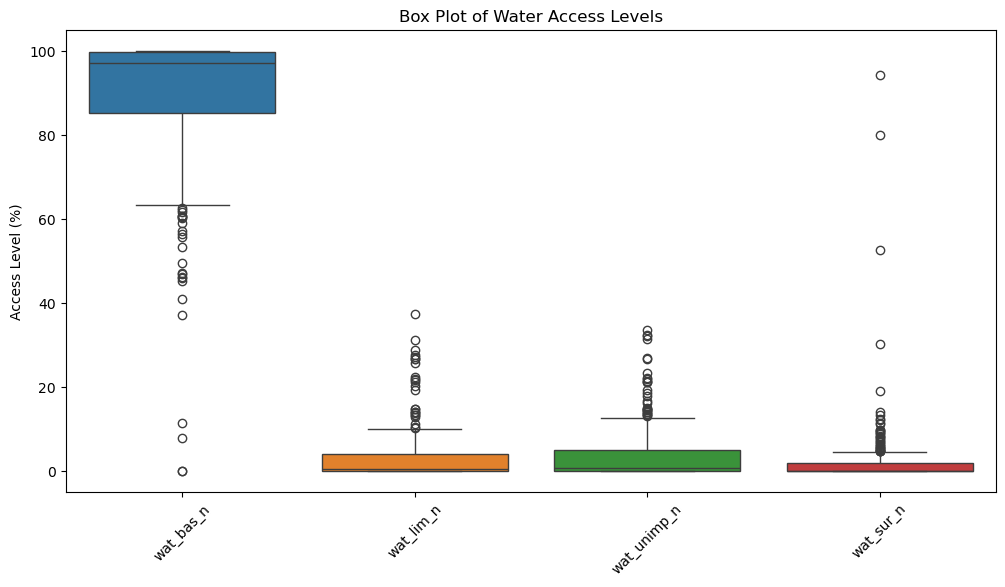

In [41]:
# Box Plot for Water Access Levels
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[water_access_columns])
plt.title('Box Plot of Water Access Levels')
plt.ylabel('Access Level (%)')
plt.xticks(rotation=45)
plt.show()

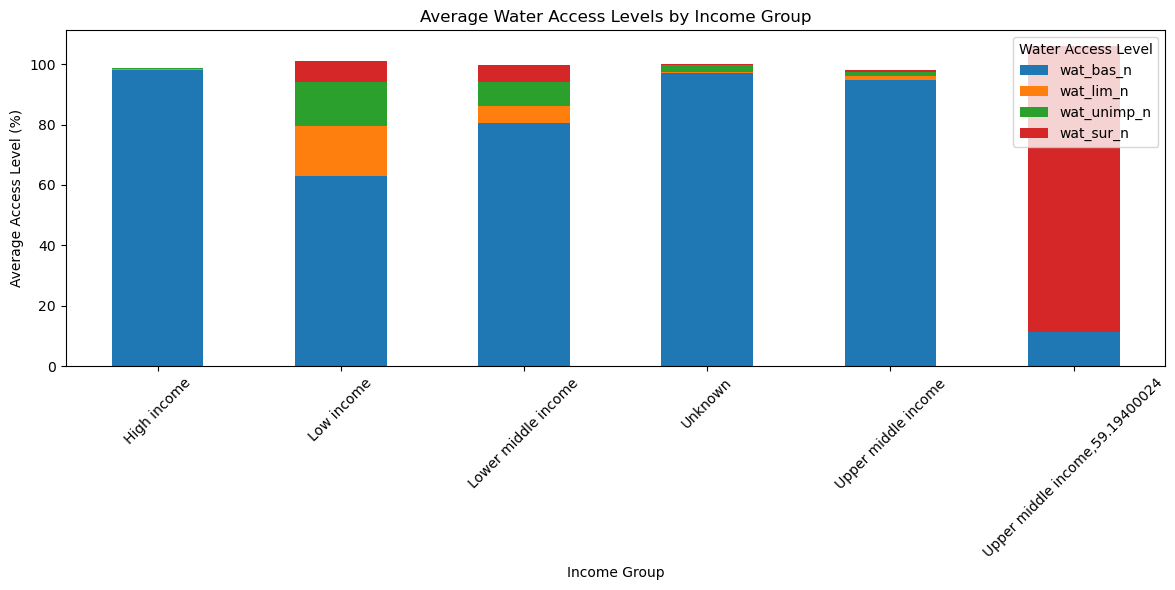

In [44]:
# Stacked Column Chart for Water Access by Income Group
agg_data = df.groupby('income_groups')[water_access_columns].mean().reset_index()
agg_data.set_index('income_groups', inplace=True)
agg_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Water Access Levels by Income Group')
plt.ylabel('Average Access Level (%)')
plt.xlabel('Income Group')
plt.xticks(rotation=45)
plt.legend(title='Water Access Level')
plt.tight_layout()
plt.show()

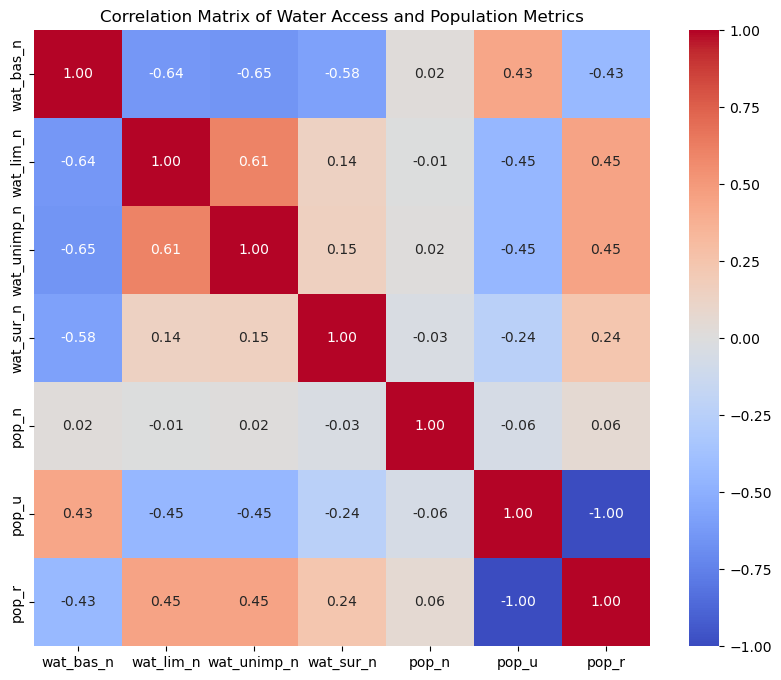

In [45]:
# Investigating Relationships
# Correlation Matrix
correlation_matrix = df[water_access_columns + ['pop_n', 'pop_u', 'pop_r']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Water Access and Population Metrics')
plt.show()

In [46]:
# Addressing Outliers
# Identify outliers in water access levels
for col in water_access_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in '{col}':")
    print(outliers[['name', col]])

Outliers in 'wat_bas_n':
                                 name  wat_bas_n
22                   Marshall Islands      11.39
46                         Cabo Verde       7.90
65                      Guinea-Bissau      59.02
84                            Croatia       0.00
89           Central African Republic      37.20
116                  Papua New Guinea      45.34
130                       South Sudan      40.95
136                           Burundi      62.21
138                            Rwanda      60.41
140                          Zimbabwe      62.67
141                           Somalia      56.48
142                              Chad      46.19
155                      Burkina Faso      47.21
157                             Niger      46.91
162                        Madagascar      53.39
165                             Yemen      60.66
169                            Angola      57.17
179                             Sudan      60.45
181                         Argentina       

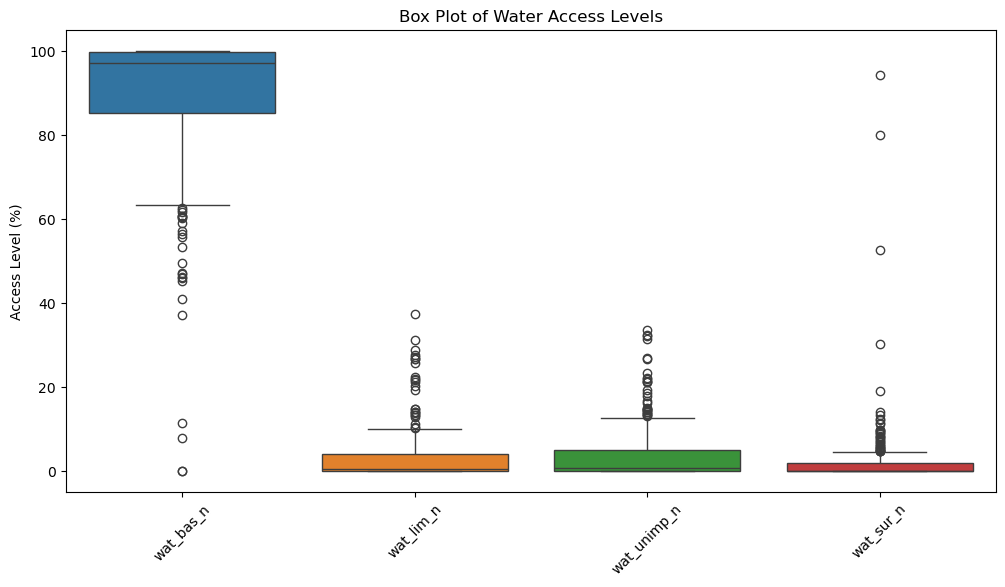

In [47]:
# Box Plot for Water Access Levels
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[water_access_columns])
plt.title('Box Plot of Water Access Levels')
plt.ylabel('Access Level (%)')
plt.xticks(rotation=45)
plt.show()

In [49]:
# Drawing Insights
# Example insights based on the analysis
print("Insights about Global Water Access Patterns:")
print("1. Higher income groups tend to have better access to water services.")
print("2. Urban areas generally have higher access levels compared to rural areas.")
print("3. Countries with larger populations may face challenges in providing adequate water access.")

Insights about Global Water Access Patterns:
1. Higher income groups tend to have better access to water services.
2. Urban areas generally have higher access levels compared to rural areas.
3. Countries with larger populations may face challenges in providing adequate water access.


In [50]:
# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)
print('Cleaned dataset saved as "cleaned_dataset.csv"')

Cleaned dataset saved as "cleaned_dataset.csv"


In [51]:
df1 = pd.read_csv('cleaned_dataset.csv')
df1

,name,pop_n,pop_u,wat_bas_n,is_numeric_wat_bas_n,wat_lim_n,is_numeric_wat_lim_n,wat_unimp_n,is_numeric_wat_unimp_n,wat_sur_n,...,is_numeric_wat_bas_u,wat_lim_u,is_numeric_wat_lim_u,wat_unimp_u,is_numeric_wat_unimp_u,wat_sur_u,is_numeric_wat_sur_u,value_cnt,income_groups,pop_r
0,Tokelau,1.35,0.000000,99.71,True,0.00,True,0.29,True,0.00,...,True,0.000000,True,0.000000,True,0.000000,True,30,Unknown,100.000000
1,Niue,1.62,46.202003,97.01,True,0.00,True,2.99,True,0.00,...,True,0.000000,True,0.000000,True,0.000000,True,30,Unknown,53.797997
2,Falkland Islands (Malvinas),3.48,78.507996,95.31,True,0.00,True,4.69,True,0.00,...,True,0.000000,True,0.000000,True,0.000000,True,30,Unknown,21.492004
3,Montserrat,5.00,9.115000,98.08,True,0.00,True,1.92,True,0.00,...,True,0.000000,True,0.000000,True,0.000000,True,30,Unknown,90.885000
4,Saint Pierre and Miquelon,5.80,89.961998,91.40,True,0.00,True,8.60,True,0.00,...,True,0.000000,True,0.000000,True,0.000000,True,30,Unknown,10.038002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,Pakistan,220892.33,37.165001,90.15,True,3.82,True,4.41,True,1.62,...,True,3.771561,True,3.126185,True,0.334204,True,30,Lower middle income,62.834999
209,Indonesia,273523.62,56.640999,92.42,True,0.86,True,5.55,True,1.18,...,True,0.608510,True,1.679615,True,0.131363,True,30,Lower middle income,43.359001
210,United States of America,331002.66,82.664001,99.88,True,0.00,True,0.12,True,0.00,...,True,0.000000,True,0.071856,True,0.000000,True,30,High income,17.335999
211,India,1380004.38,34.926003,90.49,True,4.98,True,3.96,True,0.56,...,True,3.272056,True,2.820608,True,0.237300,True,30,Lower middle income,65.073997
